<a href="https://colab.research.google.com/github/Henil21/Ml_salary_prediction/blob/main/Salary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
import numpy as np

In [2]:
Data=pd.read_csv('https://raw.githubusercontent.com/Henil21/Data_set/main/Data_Science_Fields_Salary_Categorization.csv')
Data.head()
data=Data.drop('Salary_In_Rupees',axis=1)
salary=Data["Salary_In_Rupees"]
salary

0       6352272.0
1      20688070.0
2       8674985.0
3       1591390.0
4      11935425.0
          ...    
598    12731120.0
599    10344035.0
600     5331157.0
601     4137614.0
602    12253703.0
Name: Salary_In_Rupees, Length: 603, dtype: float64

In [3]:
x_train,x_test,y_train,y_test=train_test_split(data,salary,test_size=0.2,random_state=42)
ct=make_column_transformer(
    (MinMaxScaler(),['Remote_Working_Ratio']),
    (OneHotEncoder(handle_unknown="ignore"),['Designation','Experience','Employment_Status','Employee_Location','Company_Location','Company_Size'])
)
data=Data.drop('Salary_In_Rupees',axis=1)
salary=Data["Salary_In_Rupees"]
X_train,X_test,Y_train,Y_test=train_test_split(data,salary,test_size=0.2,random_state=42)

X=Data.drop("Salary_In_Rupees",axis=1)

y=Data["Salary_In_Rupees"]

ct.fit(X_train)
x_train_normal=ct.transform(X_train)
x_test_normal=ct.transform(X_test)



In [4]:
x_train_normal.toarray()
YY=np.array(y_train)
Y_test=np.array(y_test)

In [ ]:
tf.random.set_seed(42)
model=tf.keras.Sequential([
    tf.keras.layers.Dense(1000,activation='elu'),
    tf.keras.layers.Dense(500,activation='elu'),
    tf.keras.layers.Dense(100,activation='elu'),
    tf.keras.layers.Dense(50,activation='elu'),
    tf.keras.layers.Dense(50,activation='elu'),
    tf.keras.layers.Dense(1,activation="elu"),

]
)
model.compile(loss=tf.keras.losses.mae,
                   optimizer=tf.keras.optimizers.Adam(0.1),
                   metrics=['mae'])
history=model.fit(x_train_normal,YY,epochs=500 , verbose=0)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:446: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_1/dense_6/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_1/dense_6/embedding_lookup_sparse/Reshape:0", shape=(None, 1000), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_1/dense_6/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)


In [ ]:
model.evaluate(x_test_normal,Y_test)

In [7]:
x_test

,Working_Year,Designation,Experience,Employment_Status,Employee_Location,Company_Location,Company_Size,Remote_Working_Ratio
110,2021,Machine Learning Engineer,SE,FT,DE,DE,L,50
527,2022,Data Analyst,SE,FT,US,US,M,100
567,2022,Data Analyst,MI,FT,GB,GB,M,0
77,2021,3D Computer Vision Researcher,MI,PT,IN,IN,M,50
181,2021,Data Scientist,MI,FT,DE,DE,L,50
...,...,...,...,...,...,...,...,...
340,2022,Data Engineer,SE,FT,US,US,M,100
148,2021,Data Engineering Manager,SE,FT,US,US,L,100
496,2022,Data Engineer,EN,FT,PK,DE,M,100
441,2022,Data Analyst,MI,FT,GR,GR,M,100


Text(0.5, 0, 'epochs')

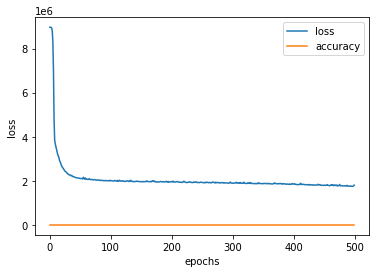

In [8]:
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

In [9]:
test=pd.read_csv('https://raw.githubusercontent.com/Henil21/Data_set/main/test_data.csv')
test_x=test.drop('Salary_In_Rupees',axis=1)
xx_test=ct.transform(test_x)

In [10]:
model.predict(xx_test)

array([[12247990. ],
       [ 8701854. ],
       [ 8995782. ],
       [  665768.1]], dtype=float32)